# Iris Data
Tableau graph shows this is what the data looks like when a scatterplot visual: 
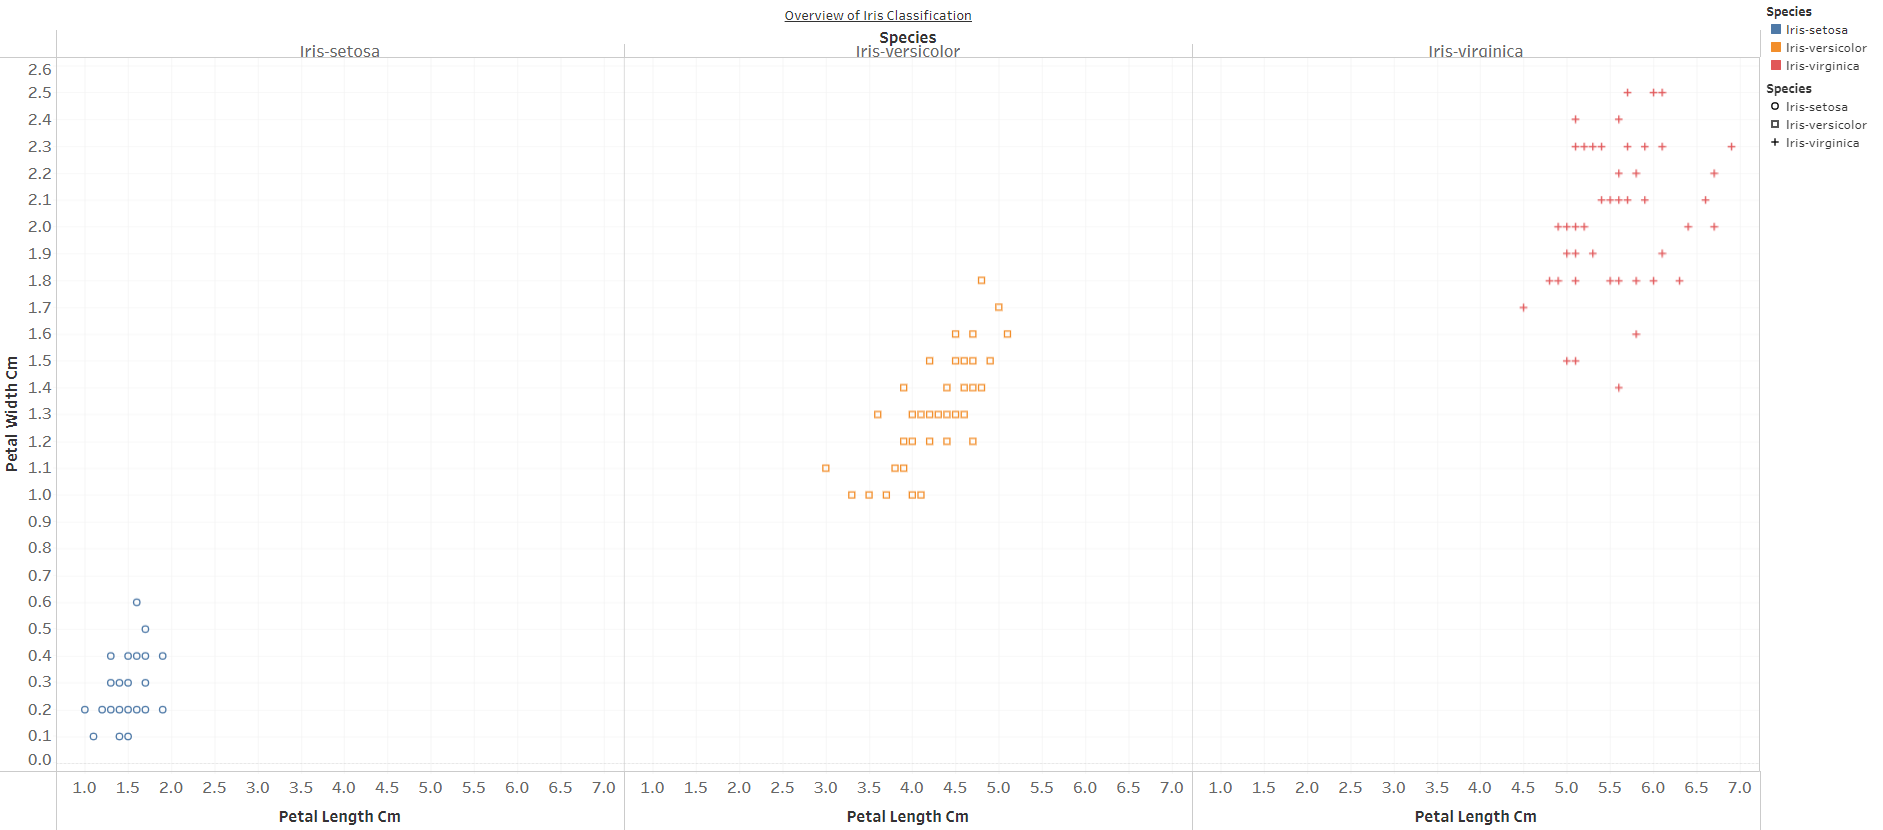
Python will analyze the same results below.

# Read Data

In [1]:
import numpy as np 
import pandas as pd 
file='/kaggle/input/iris/Iris.csv'
df = pd.read_csv(file)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# KMeans Cluster
The most common unsupervised model is k-means cluster. Clusters work best when there are fewer features so the cluster can interpret and visualize the results. In the Iris dataset, Kmeans cluster is since features are few. The code for features is features = ['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

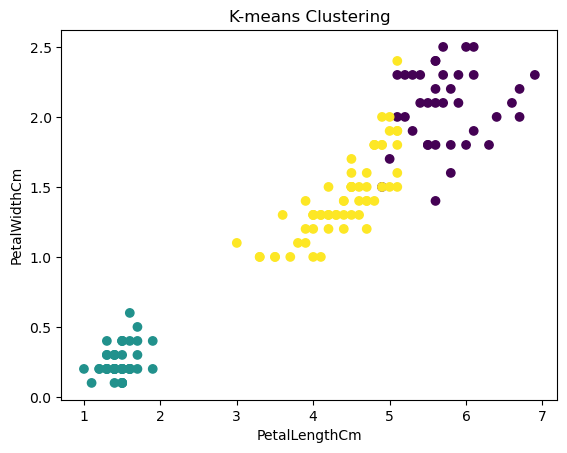

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the features for clustering
features = ['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']
k = len(features) # there are three species, so k is 3

# Create the K-means model
kmeans = KMeans(n_clusters=k, n_init=10)  # Set the desired number of clusters

# Fit the model to the data
kmeans.fit(df[features])

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataset
df['Cluster'] = labels

# Visualize the clusters
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('K-means Clustering')
plt.show()

# Cluster Center
Most common method to determine the optimal number of clusters in k-means cluster. 

Cluster Centers below:
[[5.9016129  4.39354839 1.43387097]
 [5.006      1.464      0.244     ]
 [6.85       5.74210526 2.07105263]]


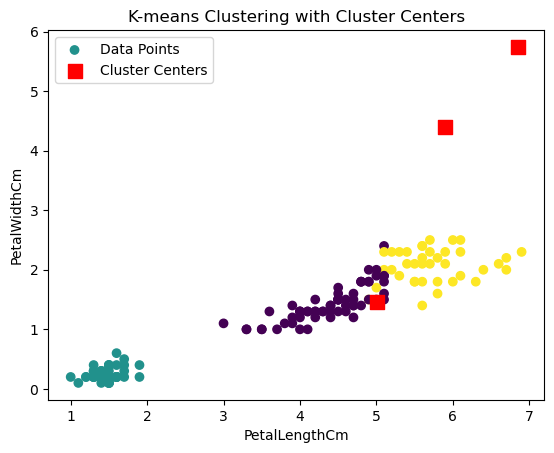

In [3]:
kmeans = KMeans(n_clusters=k, n_init=10)

kmeans.fit(df[features])
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers below:")
print(cluster_centers)

# Plot the data points
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=kmeans.labels_, cmap='viridis', label='Data Points')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='s', s=100, label='Cluster Centers')

# Set plot labels and title
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('K-means Clustering with Cluster Centers')
plt.legend()
plt.show()

# SQL Read Data

In [4]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('/kaggle/input/iris/database.sqlite')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SQL query to fetch the data
query = "SELECT * FROM Iris"
cursor.execute(query)

# Fetch all the rows returned by the query
data = cursor.fetchall()

# Print the retrieved data
for row in data:
    pass
    #print(row)

# Close the cursor and database connection
cursor.close()
conn.close()